29/321 |#####                                                   |ETA:   0:00:01

Solving system...


321/321 |#######################################################|Time:  0:00:01


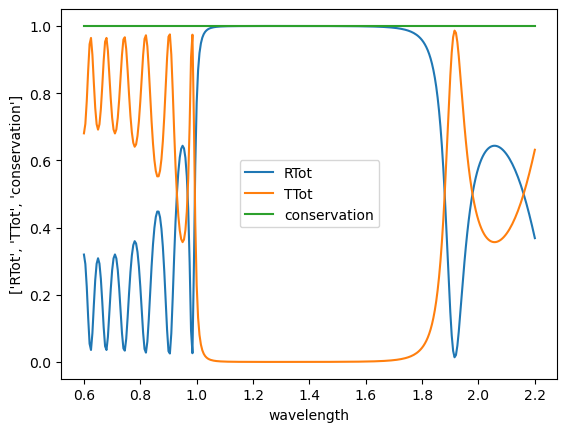

In [3]:
# Author: Jordan Edmunds, Ph.D. Student, UC Berkeley
# Contact: jordan.e@berkeley.edu
# Creation Date: 11/01/2019
#
from rcwa import Layer, LayerStack, Source, Solver, Plotter
import numpy as np
from matplotlib import pyplot as plt

def solve_system():
    designWavelength = 1.3
    startWavelength = 0.6
    stopWavelength = 2.2
    stepWavelength = 0.005

    n1 = 3.5 # refractive index of layer 1 (Si)
    n2 = 1.45 # refractive index of layer 2 (SiO2)
    t1 = designWavelength/4/n1
    t2 = designWavelength/4/n2

    reflectionLayer = Layer(n=1)
    transmissionLayer = Layer(n=n1)
    layer0 = Layer(n=n1, thickness=t1)
    layer1 = Layer(n=n2, thickness=t2)
    layer2 = Layer(n=n1, thickness=t1)
    layer3 = Layer(n=n2, thickness=t2)
    layer4 = Layer(n=n1, thickness=t1)
    layer5 = Layer(n=n2, thickness=t2)
    layer6 = Layer(n=n1, thickness=t1)
    layer7 = Layer(n=n2, thickness=t2)
    layer8 = Layer(n=n1, thickness=t1)
    layer9 = Layer(n=n2, thickness=t2)
    layer10 = Layer(n=n1, thickness=t1)
    stack = LayerStack(layer0, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9, layer10,
                       incident_layer=reflectionLayer, transmission_layer=transmissionLayer)
    source = Source(wavelength=designWavelength)

    print("Solving system...")
    TMMSolver = Solver(stack, source, 1)
    wavelengths = np.arange(startWavelength, stopWavelength + stepWavelength,
            stepWavelength)

    results = TMMSolver.solve(wavelength=wavelengths)
    return results


# if __name__ == '__main__':
results = solve_system()
fig, ax = results.plot(x='wavelength', y=['RTot', 'TTot', 'conservation'])
plt.show()

In [4]:
from rcwa import Source, Layer, LayerStack, Crystal, Solver, RectangularGrating
from rcwa.shorthand import complexArray
import numpy as np


def solve_system():

    reflection_layer = Layer(er=1.0, ur=1.0)
    transmission_layer = Layer(er=9.0, ur=1.0)

    wavelength = 0.5
    deg = np.pi / 180
    k0 = 2*np.pi/wavelength
    theta = 60 * deg
    phi = 1*deg
    pTEM = 1/np.sqrt(2)*complexArray([1,1j])
    source = Source(wavelength=wavelength, theta=theta, phi=phi, pTEM=pTEM, layer=reflection_layer)

    crystal_thickness = 0.5

    N_harmonics = 11

    grating_layer = RectangularGrating(period=2, thickness=0.5, n=4, n_void=1, nx=500)
    layer_stack = LayerStack(grating_layer, incident_layer=reflection_layer, transmission_layer=transmission_layer)

    solver_1d = Solver(layer_stack, source, N_harmonics)
    results = solver_1d.solve()

    return results

# if __name__ == '__main__':
results = solve_system()

# Get the amplitude reflection and transmission coefficients
(rxCalculated, ryCalculated, rzCalculated) = (results['rx'], results['ry'], results['rz'])
(txCalculated, tyCalculated, tzCalculated) = (results['tx'], results['ty'], results['tz'])

# Get the diffraction efficiencies R and T and overall reflection and transmission coefficients R and T
(R, T, RTot, TTot) = (results['R'], results['T'], results['RTot'], results['TTot'])
print(RTot, TTot, RTot+TTot)

1/1 |###########################################################|Time:  0:00:00


0.305320375230956 0.6946796247690524 1.0000000000000084


601/601 |#######################################################|Time:  0:00:00


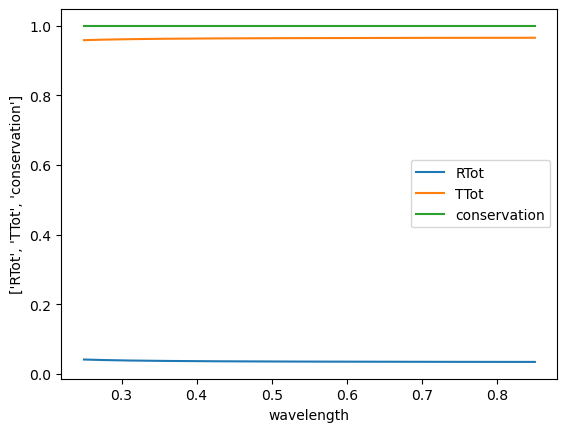

In [6]:
# Author: Jordan Edmunds, Ph.D. Student, UC Berkeley
# Contact: jordan.e@berkeley.edu
# Creation Date: 11/01/2019
#
from rcwa import Material, Layer, LayerStack, Source, Solver, Plotter
import numpy as np
from matplotlib import pyplot as plt

def solve_system():
        startWavelength = 0.25
        stopWavelength = 0.85
        stepWavelength = 0.001

        source = Source(wavelength=startWavelength)
        siO2 = Material('SiO2')

        reflectionLayer = Layer(n=1) # Free space
        transmissionLayer = Layer(material=siO2)
        stack = LayerStack(incident_layer=reflectionLayer, transmission_layer=transmissionLayer)

        TMMSolver = Solver(stack, source, (1, 1))
        wavelengths = np.arange(startWavelength, stopWavelength + stepWavelength,
                stepWavelength)

        results = TMMSolver.solve(wavelength=wavelengths)
        return results


# if __name__ == '__main__':
results = solve_system()
fig, ax = results.plot(x='wavelength', y=['RTot', 'TTot', 'conservation'])
plt.show()